In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import var, mean, sqrt
from pandas import Series

def cohend(d1: Series, d2: Series) -> float:

    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s

## Data Discription and Visusalizations

In [105]:
Qdata = pd.read_csv("./BIG5/data.csv",sep ='\t')

In [106]:
Qdata[:10]

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
5,13,31,1,2,1,2,US,1,5,2,...,4,2,1,3,3,5,5,4,5,3
6,5,20,1,2,1,5,US,5,1,5,...,3,1,5,1,4,1,4,3,3,4
7,4,23,2,1,1,2,IN,4,3,5,...,3,1,5,1,4,1,5,3,2,5
8,5,39,1,2,3,4,US,3,1,5,...,3,3,5,3,5,1,5,3,4,5
9,3,18,1,2,1,5,US,1,4,2,...,4,2,5,2,4,1,4,3,4,4


#### We have a total of 19710 data points and for each we have the the answers of the 50 Questions

In [107]:
print(len(Qdata))
Qdata = Qdata.dropna()
print(len(Qdata))
Qdata.columns

19719
19710


Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

#### List of all countries which have more than 600 participant 

In [108]:
group_by_country = Qdata.groupby(['country']).size()

country_list  = list()
no_of_samples_in_country = list() 
for group , data in group_by_country.iteritems():
    if data > 600:# if more than 600 people have filled the survay
        country_list.append(group)
        no_of_samples_in_country.append(data)
pd.DataFrame({'Country': country_list , 'Sample Size': no_of_samples_in_country})

,Country,Sample Size
0,AU,974
1,CA,924
2,GB,1531
3,IN,1464
4,PH,649
5,US,8753


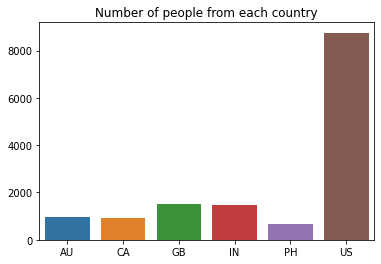

In [109]:
sns.barplot(x = country_list , y = no_of_samples_in_country).set_title("Number of people from each country")
plt.savefig("Number_of_people_from_each_country.jpeg")

#### We are taking all the people which are more than the age of 20 as we want to talk about the adults in the popluation

In [110]:
Qdata_filtred = Qdata[Qdata['country'].isin(country_list)]
Qdata_filtred = Qdata_filtred[Qdata_filtred['age'] > 20]

#### List of no of people by race

1=Mixed Race,
2=Arctic (Siberian, Eskimo), 
3=Caucasian (European), 
4=Caucasian (Indian), 
5=Caucasian (Middle East), 
6=Caucasian (North African, Other), 
7=Indigenous Australian, 
8=Native American, 
9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 
10=Pacific (Polynesian, Micronesian, etc), 
11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 
12=West African, Bushmen, Ethiopian, 
13=Other (0=missed)

In [111]:
group_by_country = Qdata.groupby(['race']).size()

race_list  = list()
no_of_samples_in_race = list() 
for group , data in group_by_country.iteritems():
    race_list.append(group)
    no_of_samples_in_race.append(data)
race_data = pd.DataFrame({'Race': race_list , 'Sample Size': no_of_samples_in_race})
race_data

,Race,Sample Size
0,0,153
1,1,1433
2,2,14
3,3,10535
4,4,1518
5,5,514
6,6,397
7,7,24
8,8,201
9,9,188


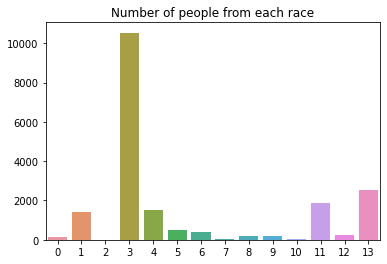

In [112]:
sns.barplot(x = race_list , y = no_of_samples_in_race).set_title("Number of people from each race")
plt.savefig("Number_of_people_from_each_race.jpeg")

#### Gender Distribution in the 6 coutries which are are above 20

In [113]:
group_by_country_600 = Qdata_filtred.groupby('country')
# 1=Male, 2=Female, 3=Other (0=missed)
country_list.clear()
male = []
female = []
for name, group in group_by_country_600:
    country_list.append(name)
    genders = group['gender'].value_counts()
    male.append(genders[1])
    female.append(genders[2])
gender_dirtibution = pd.DataFrame({"male": male, "female":female})
gender_dirtibution.index = country_list

In [114]:
gender_dirtibution

,male,female
AU,203,291
CA,178,335
GB,339,471
IN,676,435
PH,72,194
US,1658,3187


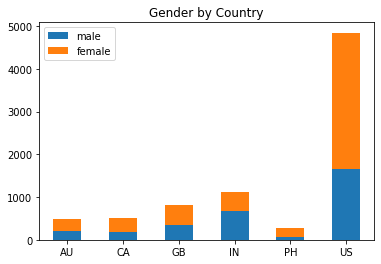

In [115]:
gender_dirtibution.plot(kind = 'bar', stacked = True)
plt.title('Gender by Country')
plt.xticks(rotation=0, ha='center')
plt.savefig("Gender_country_wise.jpeg")

#### Distribution by age

In [116]:
country_list.clear()
young = []
old = []
for name, group in group_by_country_600:
    country_list.append(name)
    young_no = len(group[(group['age'] >= 20) & (group['age'] <= 33)])
    old_no   = len(group[(group['age'] >= 37)])
    young.append(young_no)
    old.append(old_no)
age_dirtibution = pd.DataFrame({"young": young, "Mature":old})
age_dirtibution.index = country_list
age_dirtibution

,young,Mature
AU,275,193
CA,289,188
GB,456,302
IN,966,107
PH,219,41
US,2765,1795


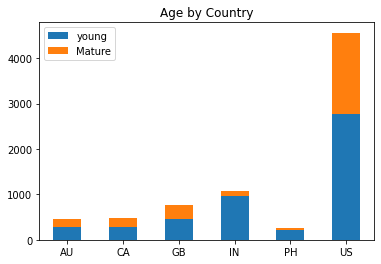

In [117]:
age_dirtibution.plot(kind = 'bar', stacked = True)
plt.title('Age by Country')
plt.xticks(rotation=0, ha='center')
plt.savefig("Mature_yound.jpeg")

Old people are less involed in tecnological things that youger significanlty in developing country

In [118]:
print(len(Qdata_filtred))
Qdata_filtred = Qdata_filtred.dropna()
len(Qdata_filtred)

8073


8073

All the Rows are populated and no null value is present

#### The Formula to covert the question answers to the personality scores which is present in paper https://openpsychometrics.org/printable/big-five-personality-test.pdf

In [119]:
def extraVersion(data):
    E = 20 +data[0] -data[1] +data[2] -data[3] +data[4] -data[5] +data[6] -data[7] +data[8] -data[9]
    return E
def neurotsisim(data):
    N = 38 -data[0] +data[1] -data[2] +data[3] -data[4] -data[5] -data[6] -data[7] -data[8] -data[9]
    return N
def agreeableness(data):
    A = 14 -data[0] +data[1] -data[2] +data[3] -data[4] +data[5] -data[6] +data[7] +data[8] +data[9]
    return A
def concentioness(data):
    C = 14 +data[0] -data[1] +data[2] -data[3] +data[4] -data[5] +data[6] -data[7] +data[8] +data[9]
    return C
def openness(data):
    O = 8 +data[0] -data[1] +data[2] -data[3] +data[4] -data[5] +data[6] +data[7] +data[8] +data[9]
    return O
def personality_Scores(IndQdata):#ENACO
    E = extraVersion(IndQdata[:10])
    N = neurotsisim(IndQdata[10:20])
    A = agreeableness(IndQdata[20:30])
    C = concentioness(IndQdata[30:40])
    O = openness(IndQdata[40:50])
    return [E, N, A, C, O]
personality_scores = [] 
for row in Qdata_filtred.iterrows():
    metaData = list(row[1][:7])
    metaData.extend(personality_Scores(row[1][7:]))
    personality_scores.append(metaData)

In [120]:
data_personality_score = pd.DataFrame(personality_scores, columns=['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', "E", "N", "A", "C", "O"])

In [121]:
data_personality_score.head()

,race,age,engnat,gender,hand,source,country,E,N,A,C,O
0,3,53,1,1,1,1,US,34,39,36,37,33
1,13,46,1,2,1,1,US,12,19,25,32,16
2,11,25,2,2,1,2,US,24,20,34,24,24
3,13,31,1,2,1,2,US,6,26,26,21,23
4,4,23,2,1,1,2,IN,29,35,31,34,32


#### Distribution of Extroversion 

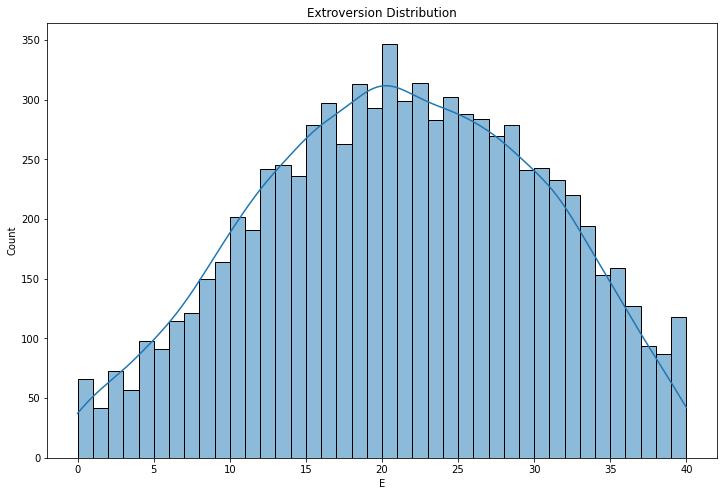

In [122]:
plt.figure(figsize = (12,8))
sns.histplot(data = data_personality_score,x = 'E',kde = True ,binwidth=1).set_title("Extroversion Distribution")
plt.savefig("Extroversion Distribution.jpeg")

#### Distribution of Openness 

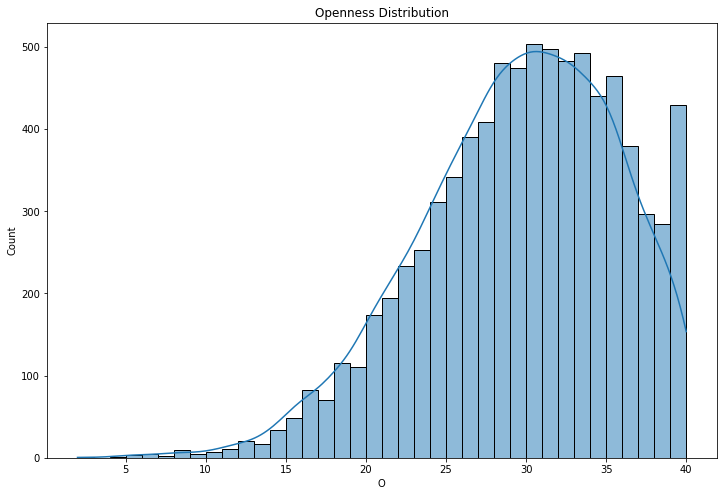

In [123]:
plt.figure(figsize = (12,8))
sns.histplot(data = data_personality_score,x = 'O', binwidth=1, kde = True ).set_title("Openness Distribution")
plt.savefig("Openness Distribution.jpeg")

The Openess is -vely skewed 

#### Distrbution of Neuroticism 

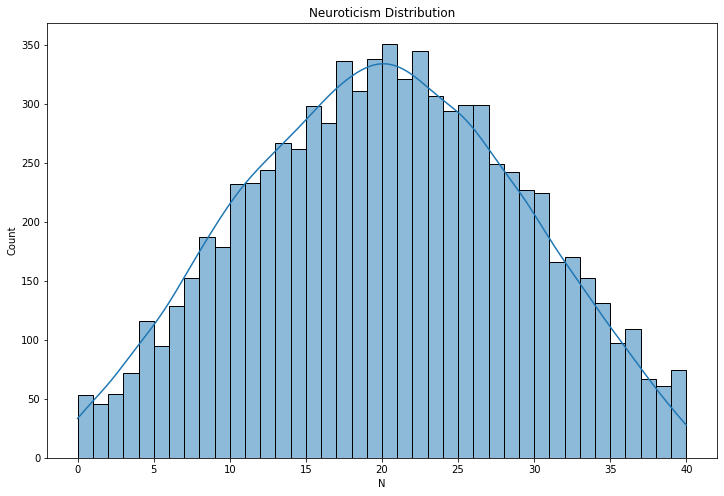

In [124]:
plt.figure(figsize = (12,8))
sns.histplot(data = data_personality_score,x = 'N', binwidth=1, kde = True ).set_title("Neuroticism Distribution")
plt.savefig("Neuroticism Distribution.jpeg")

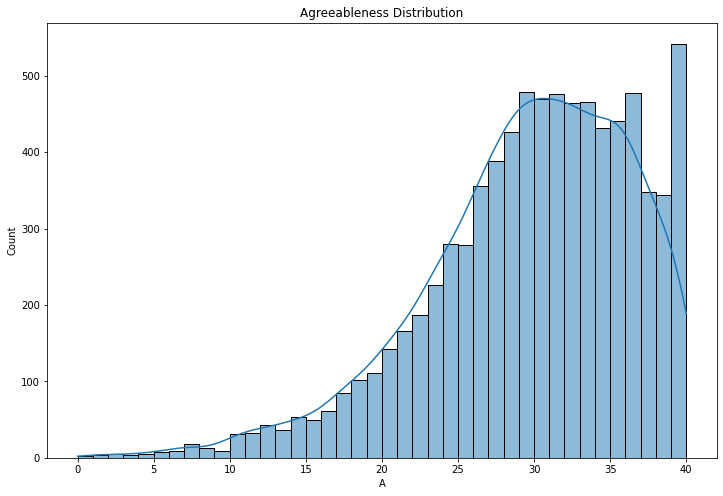

In [125]:
plt.figure(figsize=(12,8))
sns.histplot(data = data_personality_score,x = 'A', binwidth=1, kde = True ).set_title('Agreeableness Distribution')
plt.savefig('Agreeableness Distribution.jpeg')

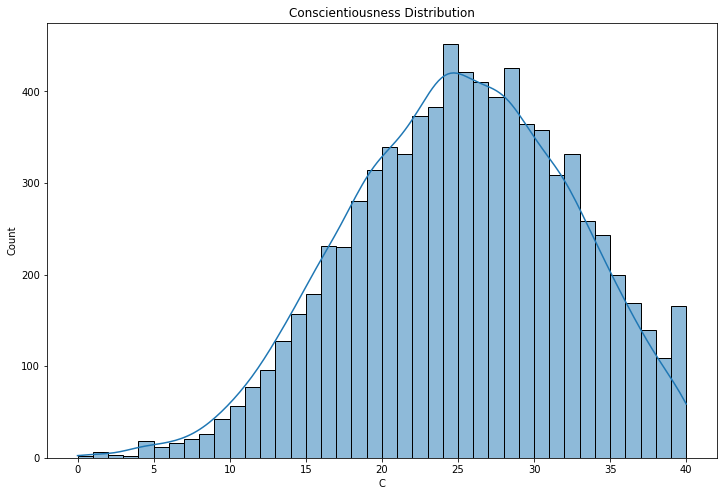

In [126]:
plt.figure(figsize=(12,8))
sns.histplot(data = data_personality_score,x = 'C', binwidth=1, kde = True ).set_title('Conscientiousness Distribution')
plt.savefig('Conscientiousness Distribution.jpeg')

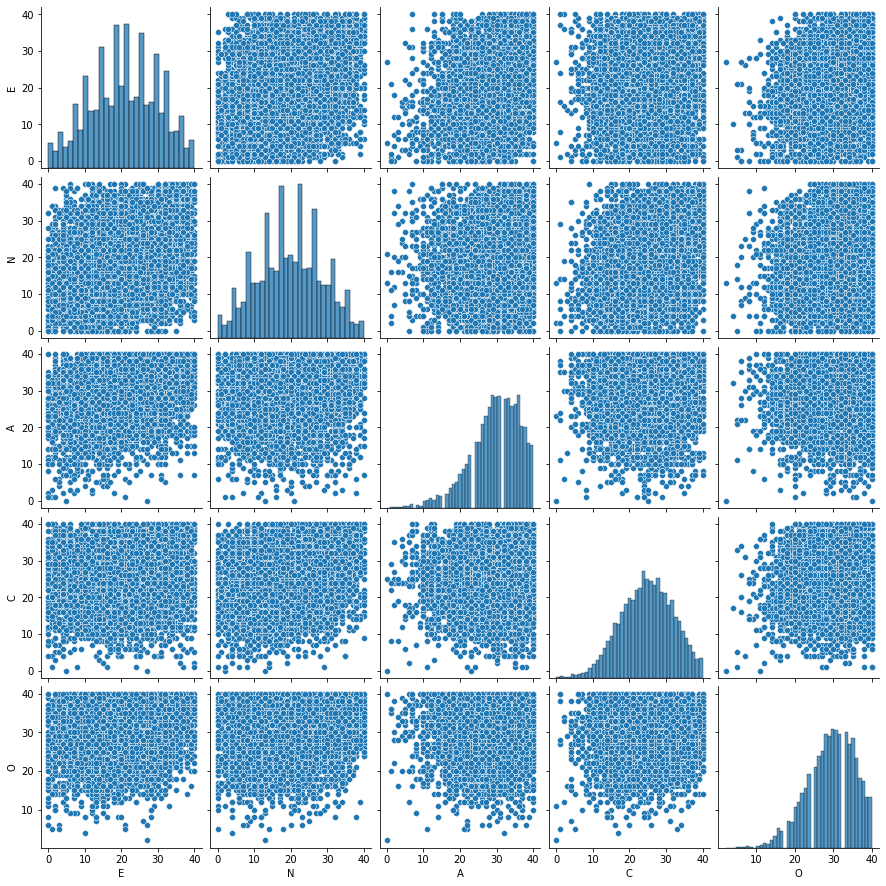

In [127]:
feature = ['E','N','A','C','O']
sns.pairplot(data_personality_score,x_vars=feature,y_vars=feature)

[]

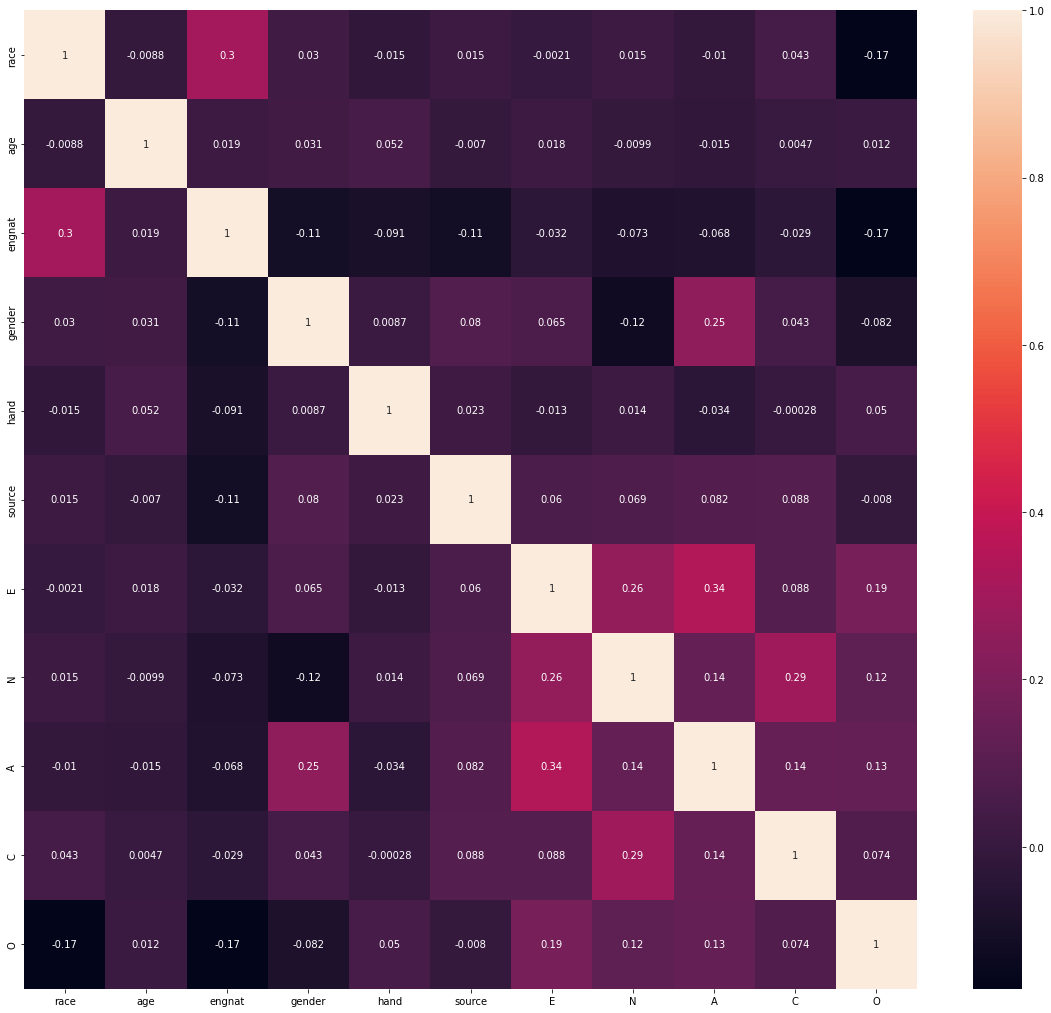

In [128]:
plt.figure(figsize=(20,18))
sns.heatmap(data_personality_score.corr(),annot=True)
plt.savefig('corelation.jpeg')
plt.plot()

## Analysing Intra-gender differences for Developed and developing countries 

In [129]:
female_scores = data_personality_score[data_personality_score['gender']==2]
Developing_countries = ['IN' , 'PH']
Developing = female_scores[female_scores['country'].isin(Developing_countries)]
len(Developing)

629

In [130]:
developed_countries = ['AU' , 'CA' , 'GB', 'US']
developed_all = female_scores[female_scores['country'].isin(developed_countries)]
print(len(developed_all))

4284


In [131]:
import pingouin as pg
from statsmodels.sandbox.stats.multicomp import multipletests
p_vals = []
cI_openess = [0,0]
for i in range(3000):
    developed = developed_all.sample(n=700)
    agreble = pg.ttest(Developing['A'],developed['A'])
    openess = pg.ttest(Developing['O'],developed['O'])
    cI_openess[0] += openess['CI95%'][0][0]
    cI_openess[1] += openess['CI95%'][0][1]
    extroversion = pg.ttest(Developing['E'],developed['E'])
    neurotism = pg.ttest(Developing['N'],developed['N'])
    con = pg.ttest(Developing['C'],developed['C'])
    p_vals.append([agreble[agreble.columns[3]][0], openess[openess.columns[3]][0], extroversion[extroversion.columns[3]][0], neurotism[neurotism.columns[3]][0],con[con.columns[3]][0]])

p_values =  np.median(np.array(p_vals),axis=0)
p_values

array([5.17732077e-11, 2.53208162e-16, 3.78087840e-02, 3.51835673e-07,
       2.38264396e-02])

In [132]:
con = pg.ttest(Developing['C'],developed['C'])

In [133]:
con

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.4467,1326.99411,two-sided,0.014546,"[-1.72, -0.19]",0.133643,1.182,0.681113


In [134]:
[cI_openess[0]/300, cI_openess[1]/300]

[-34.53306666666675, -21.347966666666704]

In [135]:
p_adjusted = multipletests(p_values, method='bonferroni')
p_adjusted

(array([ True,  True, False,  True, False]),
 array([2.58866038e-10, 1.26604081e-15, 1.89043920e-01, 1.75917836e-06,
        1.19132198e-01]),
 0.010206218313011495,
 0.01)

In [136]:
effect_agreble = cohend(Developing['A'],developed['A'])
effect_openess = cohend(Developing['O'],developed['O'])
effect_extroversion = cohend(Developing['E'],developed['E'])
effect_neurotism = cohend(Developing['N'],developed['N'])
effect_con = cohend(Developing['C'],developed['C'])

In [137]:
print([effect_agreble,effect_openess,effect_extroversion,effect_neurotism,effect_con])

[-0.36469554338473587, -0.451507314236259, -0.06071921487228171, -0.23254595576517514, -0.13364256608092775]


['A','O','E','N','C'] as we have tested for all the 5 personality traits now we have to also use the correction methods which is bonferroni 

This suggests that is a significant difference between Females of Developing countries and developed countries for neurotisism ,openess , agreeablenes and Developing country females all of them have lower score for all the above trait but the effect in openess is the only one which is significant

In [138]:
Developing.head()

,race,age,engnat,gender,hand,source,country,E,N,A,C,O
27,13,25,2,2,1,1,IN,22,26,35,34,22
73,9,23,2,2,1,1,PH,32,21,36,33,38
75,1,33,2,2,1,1,IN,18,31,30,31,29
86,4,26,2,2,1,1,IN,26,23,29,26,34
89,4,22,2,2,1,1,IN,33,23,34,28,20


In [139]:
import plotly.graph_objects as go
import plotly.offline as pyo



medians_female_DP = np.median(np.array(Developing[['E','N','A','C','O']]),axis=0)
medians_female_Dd = np.median(np.array(developed_all[['E','N','A','C','O']]),axis=0)
categories = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
categories = [*categories, categories[0]]



female_DP = list(medians_female_DP)
female_Dd = list(medians_female_Dd)



female_DP = [*female_DP, female_DP[0]]
female_Dd = [*female_Dd, female_Dd[0]]




fig = go.Figure(
data=[
go.Scatterpolar(r=female_DP, theta=categories,fill='toself', name='Females in Developing countries'),
go.Scatterpolar(r=female_Dd, theta=categories,fill='toself', name='Females in Developed Countries')
],
layout=go.Layout(
title=go.layout.Title(text='Restaurant comparison'),
polar={'radialaxis': {'visible': True}},
showlegend=True
)
)

pyo.plot(fig)

'temp-plot.html'

In [140]:
medians_female_DP

array([20., 17., 29., 25., 27.])

In [38]:
medians_female_Dd

array([22., 19., 32., 26., 30.])

## Differences between Males of Developed and Developing countries

In [39]:
male_scores = data_personality_score[data_personality_score['gender']==1]
underDeveloped_countries = ['IN' , 'PH']
developing_male= male_scores[male_scores['country'].isin(underDeveloped_countries)]
developing_male.head()
len(developing_male)

748

In [40]:
developed_countries = ['AU' , 'CA' , 'GB', 'US']
developed_all_male = male_scores[male_scores['country'].isin(developed_countries)]
print(len(developed_all_male))
developed_all_male.head()

2378


,race,age,engnat,gender,hand,source,country,E,N,A,C,O
0,3,53,1,1,1,1,US,34,39,36,37,33
9,3,21,1,1,1,5,US,18,31,7,32,37
15,3,21,1,1,2,2,CA,23,28,31,21,28
17,3,48,1,1,1,2,US,34,22,25,14,34
18,3,22,1,1,1,4,US,18,22,28,20,21


In [41]:
p_vals = []
cI_openess = [0,0]
for i in range(300):
    developed = developed_all.sample(n=700)
    agreble = pg.ttest(developing_male['A'],developed_all_male['A'])
    openess = pg.ttest(developing_male['O'],developed_all_male['O'])
    cI_openess[0] += openess['CI95%'][0][0]
    cI_openess[1] += openess['CI95%'][0][1]
    extroversion = pg.ttest(developing_male['E'],developed_all_male['E'])
    neurotism = pg.ttest(developing_male['N'],developed_all_male['N'])
    con = pg.ttest(developing_male['C'],developed['C'])
    p_vals.append([agreble[agreble.columns[3]][0], openess[openess.columns[3]][0], extroversion[extroversion.columns[3]][0], neurotism[neurotism.columns[3]][0],con[con.columns[3]][0]])
p_values =  np.median(np.array(p_vals),axis=0)
p_values

array([1.98232365e-04, 1.51593940e-45, 1.82381707e-02, 2.52403560e-13,
       9.92333446e-05])

In [42]:
effect_agreble = cohend(developing_male['A'],developed_all_male['A'])
effect_openess = cohend(developing_male['O'],developed_all_male['O'])
effect_extroversion = cohend(developing_male['E'],developed_all_male['E'])
effect_neurotism = cohend(developing_male['N'],developed_all_male['N'])
effect_con = cohend(developing_male['C'],developed['C'])
print([effect_agreble,effect_openess,effect_extroversion,effect_neurotism,effect_con])

[0.1348351578328748, -0.6364687382489148, -0.09187813322974764, -0.29161749064399844, -0.18741920755458885]


In [43]:
[cI_openess[0]/300, cI_openess[1]/300]

[-4.169999999999998, -3.2000000000000166]

In [44]:
p_adjusted = multipletests(p_values, method='fdr_bh')
p_adjusted

(array([ True,  True,  True,  True,  True]),
 array([2.47790456e-04, 7.57969701e-45, 1.82381707e-02, 6.31008899e-13,
        1.65388908e-04]),
 0.010206218313011495,
 0.01)

In [45]:
medians_male_DP = np.median(np.array(developing_male[['E','N','A','C','O']]),axis=0)
medians_male_Dd = np.median(np.array(developed_all_male[['E','N','A','C','O']]),axis=0)

In [46]:
medians_male_DP

array([19. , 19. , 28.5, 24. , 28. ])

In [47]:
medians_male_Dd

array([20., 22., 28., 25., 32.])

In [142]:
medians_male_DP = np.median(np.array(developing_male[['E','N','A','C','O']]),axis=0)
medians_male_Dd = np.median(np.array(developed_all_male[['E','N','A','C','O']]),axis=0)
categories = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
categories = [*categories, categories[0]]



male_DP = list(medians_male_DP)
male_Dd = list(medians_male_Dd)



male_DP = [*male_DP, male_DP[0]]
male_Dd = [*male_Dd, male_Dd[0]]




fig = go.Figure(
data=[
go.Scatterpolar(r=male_DP, theta=categories,fill='toself', name='Males in Developing countries'),
go.Scatterpolar(r=male_Dd, theta=categories,fill='toself', name='Males in Developed Countries')
],
layout=go.Layout(
title=go.layout.Title(text='comparison'),
polar={'radialaxis': {'visible': True}},
showlegend=True
)
)

pyo.plot(fig)

'temp-plot.html'

###  Analysing Inter-gender differences within Developed and developing countries 

In [49]:
female_scores = data_personality_score[data_personality_score['gender']==2]
male_scores = data_personality_score[data_personality_score['gender']==1]

Developing_female = female_scores[female_scores['country'].isin(Developing_countries)]
Developing_male = male_scores[male_scores['country'].isin(Developing_countries)]
print("Number of female in Developing countries : ",len(Developing_female))
print("Number of male in Developing countries : ",len(Developing_male))

Number of female in Developing countries :  629
Number of male in Developing countries :  748


In [50]:
medians_female_DP = np.median(np.array(Developing_female[['E','N','A','C','O']]),axis=0)
medians_male_DP = np.median(np.array(Developing_male[['E','N','A','C','O']]),axis=0)
categories = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
categories = [*categories, categories[0]]



female_DP = list(medians_female_DP)
female_Dd = list(medians_male_DP)



female_DP = [*female_DP, female_DP[0]]
female_Dd = [*female_Dd, female_Dd[0]]




fig = go.Figure(
data=[
go.Scatterpolar(r=female_DP, theta=categories,fill='toself', name='Females in Developing countries'),
go.Scatterpolar(r=female_Dd, theta=categories,fill='toself', name='Females in Developed Countries')
],
layout=go.Layout(
title=go.layout.Title(text='Restaurant comparison'),
polar={'radialaxis': {'visible': True}},
showlegend=True
)
)
pyo.plot(fig)

'temp-plot.html'

In [51]:
data_for_plot = []

for row in zip(Developing_female.iterrows(),Developing_male.iterrows()):
    E = row[0][1][7]
    N = row[0][1][8]
    A = row[0][1][9]
    C = row[0][1][10]
    O = row[0][1][11]
    E1 = row[1][1][7]
    N1 = row[1][1][8]
    A1 = row[1][1][9]
    C1 = row[1][1][10]
    O1 = row[1][1][11]
    data_for_plot.append(["developingFemaleE",E])
    data_for_plot.append(["developingMaleE",E1])
    data_for_plot.append(["developingFemaleN",N])
    data_for_plot.append(["developingMaleN",N1])
    data_for_plot.append(["developingFemaleA",A])
    data_for_plot.append(["developingMaleA",A1])
    data_for_plot.append(["developingFemaleC",C])
    data_for_plot.append(["developingMaleC",C1])
    data_for_plot.append(["developingFemaleO",O])
    data_for_plot.append(["developingMaleO",O1])
   

array =  np.array(data_for_plot)
#print(array)
data_p = pd.DataFrame({'category':array[:,0] , 'value':array[:,1]})
data_p['value'] = data_p['value'].astype('int')

In [52]:
p_vals = []
for i in range(1):
    agreble = pg.ttest(Developing_female['A'],Developing_male['A'])
    openess = pg.ttest(Developing_female['O'],Developing_male['O'])
    extroversion = pg.ttest(Developing_female['E'],Developing_male['E'])
    neurotism = pg.ttest(Developing_female['N'],Developing_male['N'])
    con = pg.ttest(Developing_female['C'],Developing_male['C'])
    p_vals.append([agreble[agreble.columns[3]][0], openess[openess.columns[3]][0], extroversion[extroversion.columns[3]][0], neurotism[neurotism.columns[3]][0],con[con.columns[3]][0]])
p_values =  np.median(np.array(p_vals),axis=0)
p_adjusted = multipletests(p_values, method='fdr_bh')
p_adjusted

(array([ True,  True,  True,  True, False]),
 array([1.74874904e-03, 2.99323628e-02, 1.96994066e-02, 7.97853129e-07,
        1.11380182e-01]),
 0.010206218313011495,
 0.01)

In [53]:
effect_agreble = cohend(Developing_female['A'],Developing_male['A'])
effect_openess = cohend(Developing_female['O'],Developing_male['O'])
effect_extroversion = cohend(Developing_female['E'],Developing_male['E'])
effect_neurotism = cohend(Developing_female['N'],Developing_male['N'])
effect_con = cohend(Developing_female['C'],Developing_male['C'])
print([effect_agreble,effect_openess,effect_extroversion,effect_neurotism,effect_con])

[0.1838470659024418, -0.12228072300218341, 0.13623256080679255, -0.284747981507304, 0.08591606363016073]


In [54]:
medians_female_DP = np.median(np.array(Developing_female[['E','N','A','C','O']]),axis=0)
medians_male_DP = np.median(np.array(Developing_male[['E','N','A','C','O']]),axis=0)
categories = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
categories = [*categories, categories[0]]

female_DP = list(medians_female_DP)
female_Dd = list(medians_male_DP)

female_DP = [*female_DP, female_DP[0]]
female_Dd = [*female_Dd, female_Dd[0]]

fig = go.Figure(
data=[
go.Scatterpolar(r=female_DP, theta=categories,fill='toself', name='Females in Developing countries'),
go.Scatterpolar(r=female_Dd, theta=categories,fill='toself', name='Females in Developed Countries')
],
layout=go.Layout(
title=go.layout.Title(text='Restaurant comparison'),
polar={'radialaxis': {'visible': True}},
showlegend=True
)
)
pyo.plot(fig)

'temp-plot.html'

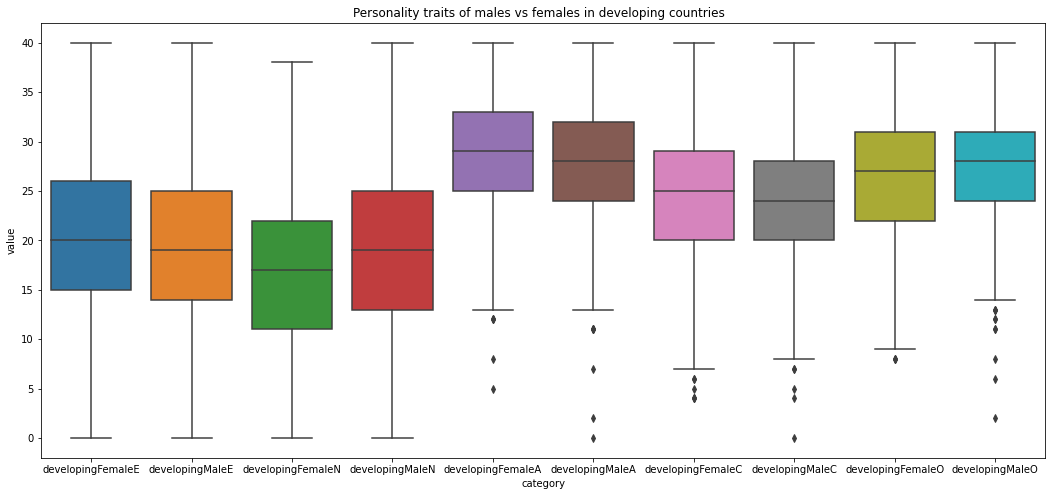

In [55]:
plt.figure(figsize=(18,8))
sns.boxplot(x="category", y="value", data=data_p).set(title="Personality traits of males vs females in developing countries  ")
plt.savefig("developing_female_male_personality.jpeg")

# It is found that female scored higher on Extroversion and aggreeabless and lower on Neuroticism and Openess in developing countries. And effect in conscientiousness is not that significant.

In [56]:
male_scores = data_personality_score[data_personality_score['gender']==1]
developed_female = female_scores[female_scores['country'].isin(developed_countries)]
developed_male = male_scores[male_scores['country'].isin(developed_countries)]
print("Number of female in Developed countries : ",len(developed_female))
print("Number of male in Developed countries : ",len(developed_male))

Number of female in Developed countries :  4284
Number of male in Developed countries :  2378


In [57]:
medians_female_Dd = np.median(np.array(developed_female[['E','N','A','C','O']]),axis=0)
medians_male_Dd = np.median(np.array(developed_male[['E','N','A','C','O']]),axis=0)
categories = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
categories = [*categories, categories[0]]

female_DP = list(medians_female_Dd)
female_Dd = list(medians_male_Dd)

female_DP = [*female_DP, female_DP[0]]
female_Dd = [*female_Dd, female_Dd[0]]

fig = go.Figure(
data=[
go.Scatterpolar(r=female_DP, theta=categories,fill='toself', name='Females in Developing countries'),
go.Scatterpolar(r=female_Dd, theta=categories,fill='toself', name='Females in Developed Countries')
],
layout=go.Layout(
title=go.layout.Title(text='Restaurant comparison'),
polar={'radialaxis': {'visible': True}},
showlegend=True
)
)
pyo.plot(fig)

'temp-plot.html'

In [58]:
data_for_plot = []

for row in zip(developed_female.iterrows(),developed_male.iterrows()):
    E = row[0][1][7]
    N = row[0][1][8]
    A = row[0][1][9]
    C = row[0][1][10]
    O = row[0][1][11]
    E1 = row[1][1][7]
    N1 = row[1][1][8]
    A1 = row[1][1][9]
    C1 = row[1][1][10]
    O1 = row[1][1][11]
    data_for_plot.append(["developedFemaleE",E])
    data_for_plot.append(["developedMaleE",E1])
    data_for_plot.append(["developedFemaleN",N])
    data_for_plot.append(["developedMaleN",N1])
    data_for_plot.append(["developedFemaleA",A])
    data_for_plot.append(["developedMaleA",A1])
    data_for_plot.append(["developedFemaleC",C])
    data_for_plot.append(["developedMaleC",C1])
    data_for_plot.append(["developedFemaleO",O])
    data_for_plot.append(["developedMaleO",O1])
   

array =  np.array(data_for_plot)
#print(array)
data_p = pd.DataFrame({'category':array[:,0] , 'value':array[:,1]})
data_p['value'] = data_p['value'].astype('int')

In [59]:
p_vals = []
cI_agreble = [0,0]
for i in range(1):
    agreble = pg.ttest(developed_female['A'],developed_male['A'])
    cI_agreble[0] += agreble['CI95%'][0][0]
    cI_agreble[1] += agreble['CI95%'][0][1]
    openess = pg.ttest(developed_female['O'],developed_male['O'])
    extroversion = pg.ttest(developed_female['E'],developed_male['E'])
    neurotism = pg.ttest(developed_female['N'],developed_male['N'])
    con = pg.ttest(developed_female['C'],developed_male['C'])
    p_vals.append([agreble[agreble.columns[3]][0], openess[openess.columns[3]][0], extroversion[extroversion.columns[3]][0], neurotism[neurotism.columns[3]][0],con[con.columns[3]][0]])
p_values =  np.median(np.array(p_vals),axis=0)
p_adjusted = multipletests(p_values, method='fdr_bh')
p_adjusted

(array([ True,  True,  True,  True,  True]),
 array([2.81051320e-108, 1.18079396e-026, 2.36286255e-007, 1.18079396e-026,
        8.05126418e-004]),
 0.010206218313011495,
 0.01)

In [60]:
effect_agreble = cohend(developed_female['A'],developed_male['A'])
effect_openess = cohend(developed_female['O'],developed_male['O'])
effect_extroversion = cohend(developed_female['E'],developed_male['E'])
effect_neurotism = cohend(developed_female['N'],developed_male['N'])
effect_con = cohend(developed_female['C'],developed_male['C'])
print([effect_agreble,effect_openess,effect_extroversion,effect_neurotism,effect_con])

[0.6121228190207104, -0.2698449091258667, 0.13406627964074774, -0.277329241774516, 0.08553097482391478]


In [61]:
print([cI_agreble[0]/300, cI_agreble[1]/300])

[0.012666666666666666, 0.015033333333333333]


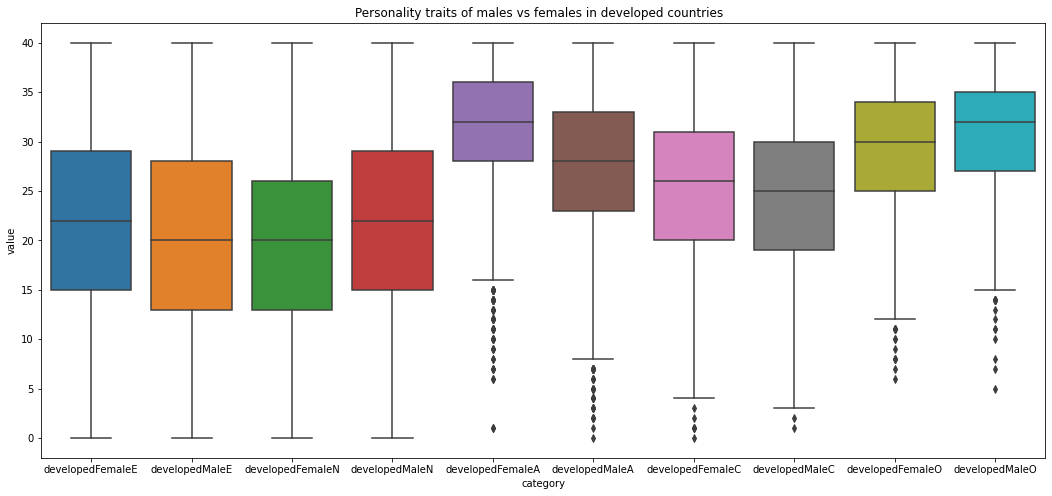

In [62]:
plt.figure(figsize=(18,8))
sns.boxplot(x="category", y="value", data=data_p).set(title="Personality traits of males vs females in developed countries  ")
plt.savefig("developed_female_male_personality.jpeg")

# It is found that female scored higher then male on Aggreeabless in developing countries with a effect size of 0.61. 

## Analysis the personality differences between Research Students and general population

In [63]:
india_data = data_personality_score[data_personality_score['country']=='IN']

In [64]:
india_data = india_data[india_data['age'] < 30]

In [65]:
len(india_data)

868

In [66]:
research_data = pd.read_csv('Big Five Survey (Responses) - Form Responses 1.csv')

In [67]:
research_data.head()

,Timestamp,Branch,Program,Age,Coporate work experience (No. of Years),Gender,I am the life of the party.,I don't talk a lot.,I feel comfortable around people.,I keep in the background.,...,I have a rich vocabulary.,I have difficulty understanding abstract ideas.,I have a vivid imagination.,I am not interested in abstract ideas.,I have excellent ideas.,I do not have a good imagination.,I am quick to understand things.,I use difficult words.,I spend time reflecting on things.,I am full of ideas.
0,3/11/2022 16:48:34,CSE,MS,24,0.5,1,4,2,4,1,...,2,2,5,2,4,1,4,2,5,5
1,4/2/2022 0:13:43,CSE,Phd,28,0,1,3,4,3,4,...,2,2,4,2,4,2,4,2,5,4
2,4/3/2022 1:17:03,CSE,MS,24,2,1,3,4,3,4,...,2,2,4,2,3,2,4,2,5,4
3,4/3/2022 1:18:14,CSE,MS,24,1,1,4,3,4,4,...,2,2,4,2,4,2,3,2,4,4
4,4/3/2022 1:29:10,CSE,MS,24,0,1,4,1,4,2,...,2,2,5,2,3,2,4,2,4,3


In [68]:
personality_scores = [] 
for row in research_data.iterrows():
    metaData = list(row[1][:6])
    metaData.extend(personality_Scores(row[1][6:]))
    personality_scores.append(metaData)
research_personality_score = pd.DataFrame(personality_scores, columns=['Timestamp', 'Branch', 'Program', 'Age', 'Coporate work experience (No. of Years)', 'Gender', "E", "N", "A", "C", "O"])

In [69]:
research_personality_score.head()

,Timestamp,Branch,Program,Age,Coporate work experience (No. of Years),Gender,E,N,A,C,O
0,3/11/2022 16:48:34,CSE,MS,24,0.5,1,34,30,29,18,30
1,4/2/2022 0:13:43,CSE,Phd,28,0,1,13,18,25,26,27
2,4/3/2022 1:17:03,CSE,MS,24,2,1,14,34,27,31,26
3,4/3/2022 1:18:14,CSE,MS,24,1,1,20,30,26,25,25
4,4/3/2022 1:29:10,CSE,MS,24,0,1,30,20,21,21,25


In [101]:
p_vals = []
cI_neuro = [0,0]
for i in range(5000):
    sample_india = india_data.sample(n=30)
    agreble = pg.ttest(research_personality_score['A'],india_data['A'])
    openess = pg.ttest(research_personality_score['O'],india_data['O'])
    extroversion = pg.ttest(research_personality_score['E'],india_data['E'])
    neurotism = pg.ttest(research_personality_score['N'],india_data['N'])
    cI_neuro[0] += neurotism['CI95%'][0][0]
    cI_neuro[1] += neurotism['CI95%'][0][1]
    con = pg.ttest(research_personality_score['C'],india_data['C'])
    p_vals.append([agreble[agreble.columns[3]][0], openess[openess.columns[3]][0], extroversion[extroversion.columns[3]][0], neurotism[neurotism.columns[3]][0],con[con.columns[3]][0]])
p_values =  np.median(np.array(p_vals),axis=0)
p_adjusted = multipletests(p_values, method='fdr_bh')
p_adjusted

(array([False,  True, False,  True, False]),
 array([5.22115225e-02, 1.70196593e-02, 5.81858658e-01, 1.32817530e-07,
        5.81858658e-01]),
 0.010206218313011495,
 0.01)

In [71]:
effect_agreble = cohend(research_personality_score['A'],india_data['A'])
effect_openess = cohend(research_personality_score['O'],india_data['O'])
effect_extroversion = cohend(research_personality_score['E'],india_data['E'])
effect_neurotism = cohend(research_personality_score['N'],india_data['N'])
effect_con = cohend(research_personality_score['C'],india_data['C'])
print([effect_agreble,effect_openess,effect_extroversion,effect_neurotism,effect_con])

[-0.23718402597628888, -0.37963436214627705, 0.08186640606840356, 0.8373520413575571, 0.09648452467404935]


In [72]:
print([cI_agreble[0]/500, cI_agreble[1]/500])

[0.0076, 0.00902]


In [73]:
data_for_plot = []

for row in research_personality_score.iterrows():
    E = row[1][6]
    N = row[1][7]
    A = row[1][8]
    C = row[1][9]
    O = row[1][10]
    data_for_plot.append(["researchE",E])
    data_for_plot.append(["researchN",N])
    data_for_plot.append(["researchA",A])
    data_for_plot.append(["researchC",C])
    data_for_plot.append(["researchO",O])

for row in india_data.iterrows():
    E = row[1][7]
    N = row[1][8]
    A = row[1][9]
    C = row[1][10]
    O = row[1][11]
    data_for_plot.append(["generalE",E])
    data_for_plot.append(["generalN",N])
    data_for_plot.append(["generalA",A])
    data_for_plot.append(["generalC",C])
    data_for_plot.append(["generalO",O])
array =  np.array(data_for_plot)
data_p = pd.DataFrame({'category':array[:,0] , 'value':array[:,1]})
data_p['value'] = data_p['value'].astype('int')

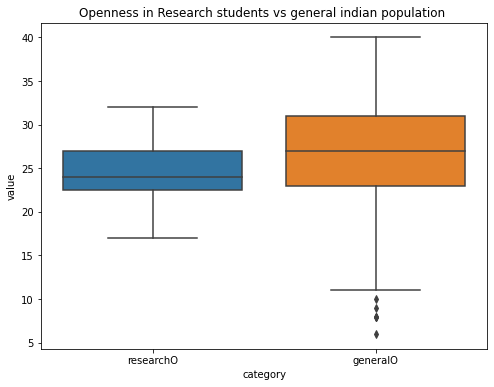

In [74]:
plt.figure(figsize=(8,6))
data_vis = data_p[(data_p['category'] == 'researchO') | (data_p['category'] == 'generalO')]
sns.boxplot(x="category", y="value", data=data_vis).set(title="Openness in Research students vs general indian population ")
plt.savefig('open_research_general.jpeg')

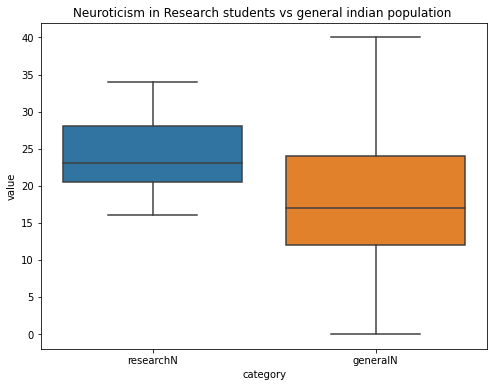

In [75]:
plt.figure(figsize=(8,6))
data_vis = data_p[(data_p['category'] == 'researchN') | (data_p['category'] == 'generalN')]
sns.boxplot(x="category", y="value", data=data_vis).set(title="Neuroticism in Research students vs general indian population ")
plt.savefig('neuro_research_general.jpeg')

### Age vs Neurotisim

In [76]:
age_sorted_data = data_personality_score.sort_values(by='age')

In [77]:
count = 0
ages = [ [] for i in range(4)]
for row in age_sorted_data.iterrows():

    count+=1
    if row[1]['age'] > 100:
        break
    elif row[1]['age']<30:
        ages[0].append(row[1]['N'])
    elif row[1]['age']<40:
        ages[1].append(row[1]['N'])
    elif row[1]['age']<50:
        ages[2].append(row[1]['N'])
    else:
        ages[3].append(row[1]['N'])

In [78]:
median_neurotisim_values = []
for age_group in ages:
    median_neurotisim_values.append(np.median(np.array(age_group),axis=0))

In [79]:
median_neurotisim_values

[19.0, 20.0, 21.0, 23.0]

In [80]:
table = []
count = 0
for age_group in ages:
    sub_table = [ [i,count] for i in age_group ]
    count+=1
    table.extend(sub_table)

In [81]:
table = np.array(table)

In [82]:
age_Neuro = pd.DataFrame({'Neuro_score':table[:,0] , 'age_interval':table[:,1]})

In [83]:
import pingouin as pg
aov = pg.welch_anova(dv='Neuro_score', between='age_interval', data=age_Neuro)

In [84]:
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,age_interval,3,2752.577669,45.946271,5.731125e-29,0.01782


In [85]:
effect01 = cohend(age_Neuro[age_Neuro['age_interval']==0], age_Neuro[age_Neuro['age_interval']==1])
effect02 = cohend(age_Neuro[age_Neuro['age_interval']==0], age_Neuro[age_Neuro['age_interval']==2])
effect03 = cohend(age_Neuro[age_Neuro['age_interval']==0], age_Neuro[age_Neuro['age_interval']==3])

In [86]:
print(effect01,effect02,effect03)

Neuro_score    -0.091734
age_interval        -inf
dtype: float64 Neuro_score    -0.221941
age_interval        -inf
dtype: float64 Neuro_score    -0.39473
age_interval       -inf
dtype: float64


In [87]:
effect12 = cohend(age_Neuro[age_Neuro['age_interval']==1], age_Neuro[age_Neuro['age_interval']==2])
effect13 = cohend(age_Neuro[age_Neuro['age_interval']==1], age_Neuro[age_Neuro['age_interval']==3])

In [88]:
print(effect12,effect13)

Neuro_score    -0.1258
age_interval      -inf
dtype: float64 Neuro_score    -0.291715
age_interval        -inf
dtype: float64


In [89]:
effect23 = cohend(age_Neuro[age_Neuro['age_interval']==2], age_Neuro[age_Neuro['age_interval']==3])
print(effect23)

Neuro_score    -0.163951
age_interval        -inf
dtype: float64


In [90]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=age_Neuro['Neuro_score'], groups=age_Neuro['age_interval'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.7908 0.0092 0.1434 1.4383   True
     0      2   1.9183    0.0 1.1655 2.6711   True
     0      3   3.4216    0.0 2.6419 4.2014   True
     1      2   1.1275 0.0042 0.2679 1.9871   True
     1      3   2.6308    0.0 1.7474 3.5141   True
     2      3   1.5033 0.0004 0.5401 2.4665   True
--------------------------------------------------


In [91]:
group0 = age_Neuro[age_Neuro['age_interval']==0]['Neuro_score'].mean()
group1 = age_Neuro[age_Neuro['age_interval']==1]['Neuro_score'].mean()
group2 = age_Neuro[age_Neuro['age_interval']==2]['Neuro_score'].mean()
group3 = age_Neuro[age_Neuro['age_interval']==3]['Neuro_score'].mean()

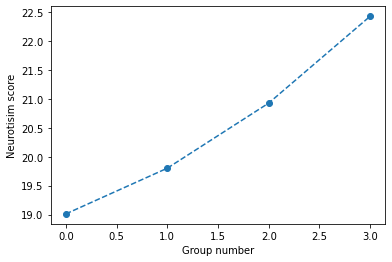

In [102]:
x = [0,1,2,3]
y = [group0,group1,group2,group3]
plt.plot(x,y,'o--')
plt.xlabel("Group number")
plt.ylabel("Neurotisim score")
plt.savefig('line.jpeg')

Even though there is a increasing effect in the line graph but this increase is not very significant as indicated by conhensd

# Developing country’s old participants are less involved in tech

In [93]:
developed_young=developed_all[developed_all['age']<30]
developed_mature=developed_all[developed_all['age']>40]

In [94]:
underDeveloped = data_personality_score[data_personality_score['country'].isin(underDeveloped_countries)]
underDeveloped_young=underDeveloped[underDeveloped['age']<30]
underDeveloped_mature=underDeveloped[underDeveloped['age']>40]

In [95]:
counts_data=[[len(developed_young), len(developed_mature)],[len(underDeveloped_young), len(underDeveloped_mature)]]

In [96]:
counts_data

[[1950, 1292], [1065, 103]]

In [97]:
from scipy.stats import chi2_contingency
  
stat, p, dof, expected = chi2_contingency(counts_data)

In [98]:
p

7.750527053177744e-85

The low value of p denotes that there is a significant difference between the counts of young and mature individuals in developing and developed countries, which denotes lesser involved in tech.

In [99]:
stat

380.94449164239677

In [103]:
expected

array([[2216.46938776, 1025.53061224],
       [ 798.53061224,  369.46938776]])